In [1]:
from __future__ import print_function

import tensorflow as tf 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [2]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Model description**

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


**Visualize the model**

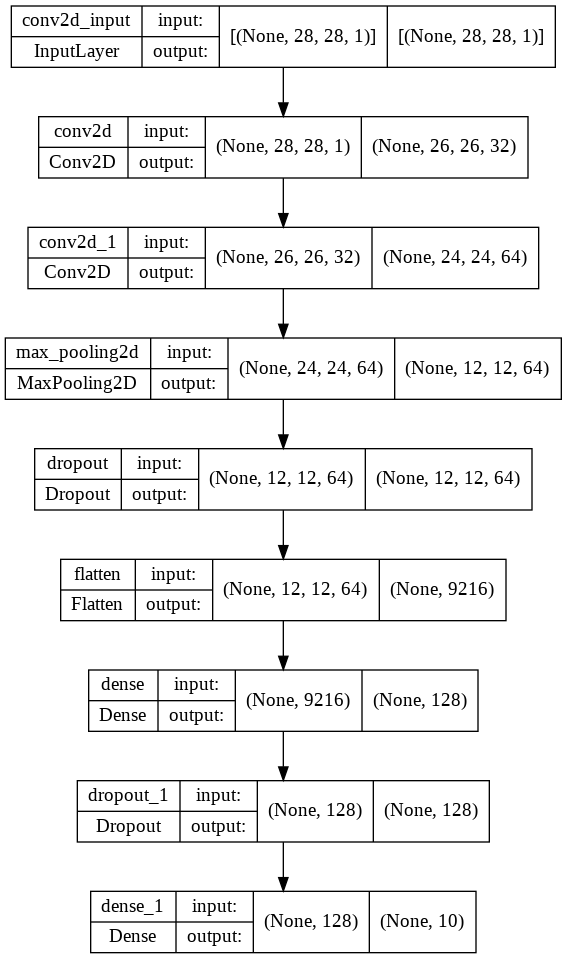

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 152s 322ms/step - loss: 2.2853 - accuracy: 0.1440 - val_loss: 2.2401 - val_accuracy: 0.3025
Epoch 2/12
469/469 [==============================] - 149s 319ms/step - loss: 2.2096 - accuracy: 0.2709 - val_loss: 2.1427 - val_accuracy: 0.5774
Epoch 3/12
469/469 [==============================] - 152s 324ms/step - loss: 2.1070 - accuracy: 0.3898 - val_loss: 2.0075 - val_accuracy: 0.6674
Epoch 4/12
469/469 [==============================] - 150s 320ms/step - loss: 1.9678 - accuracy: 0.4766 - val_loss: 1.8295 - val_accuracy: 0.7110
Epoch 5/12
469/469 [==============================] - 151s 321ms/step - loss: 1.7959 - accuracy: 0.5395 - val_loss: 1.6154 - val_accuracy: 0.7498
Epoch 6/12
469/469 [==============================] - 149s 319ms/step - loss: 1.6022 - accuracy: 0.5897 - val_loss: 1.3878 - val_accuracy: 0.7750
Epoch 7/12
469/469 [==============================] - 150s 319ms/step - loss: 1.4190 - accuracy: 0.6272 - val_loss: 1.1815 -

In [8]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6575264930725098
Test accuracy: 0.8446000218391418
